In [9]:
import pandas as pd
import dateutil
from pymongo import MongoClient
import numpy as np

dateb = dateutil.parser.parse("2017" + "-" + "1" + "-" + "1" + "T04:00:00")
datee = dateutil.parser.parse("2017" + "-" + "9" + "-" + "30" + "T22:00:00")
#buslist = ["2005-10-0","3763-10-1"]
buslist = ["675K-10-0"]
#q = {'trip_id': {"$in": buslist}, "aproxlinkstart": {"$gte": dateb, "$lt": datee}, "travel_id": 4401}
#q = {'trip_id': {"$in": buslist}, "aproxlinkstart": {"$gte": dateb, "$lt": datee}, "link":'(3894, 3895)'}
q = {'trip_id': {"$in": buslist}, "aproxlinkstart": {"$gte": dateb, "$lt": datee}}

#q = {'trip_id': {"$in": buslist}}
conn = MongoClient('172.17.163.239')
select = pd.DataFrame.from_records(conn['linktt']['ltts'].find(q))
conn.close()

AutoReconnect: 172.17.163.239:27017: [Errno 110] Connection timed out

In [8]:
select.head()

,_id,aproxlinkstart,link,ltt,travel_id,trip_id
0,5c76ed6abd8143570f3c32bf,2017-01-03 04:34:47.000,"(3876, 3877)",102.084477,22,2005-10-0
1,5c76ed6dbd8143570f3c5cab,2017-01-03 04:36:29.084,"(3877, 3878)",100.437849,22,2005-10-0
2,5c76ed6dbd8143570f3c8697,2017-01-03 04:38:09.522,"(3878, 3879)",56.156013,22,2005-10-0
3,5c76ed6dbd8143570f3cb083,2017-01-03 04:39:05.678,"(3879, 3880)",140.792663,22,2005-10-0
4,5c76ed6dbd8143570f3cda6f,2017-01-03 04:41:26.471,"(3880, 3881)",36.450797,22,2005-10-0


In [23]:
select['aproxlinkstart'].min()

Timestamp('2017-01-01 04:15:36')

In [25]:
import pickle

pickle_out = open('675K.pkl', 'wb')
pickle.dump(select, pickle_out)
pickle_out.close()

In [49]:
import pandas as pd
import dateutil
from pymongo import MongoClient
import numpy as np
import datetime

select['headway'] = select['aproxlinkstart'] - select['aproxlinkstart'].shift()

select.head()

,_id,aproxlinkstart,link,ltt,travel_id,trip_id,headway
0,5c76efc0bd8143570ffea503,2017-06-29 04:11:21,"(18032, 16066)",95.793777,24973,675K-10-0,NaT
1,5c76efc0bd8143570ffea504,2017-06-29 04:16:10,"(18032, 16066)",99.042799,24974,675K-10-0,00:04:49
2,5c76efc0bd8143570ffea505,2017-06-29 04:21:21,"(18032, 16066)",95.793777,24975,675K-10-0,00:05:11
3,5c76efc0bd8143570ffea506,2017-06-29 04:26:13,"(18032, 16066)",99.156660,24976,675K-10-0,00:04:52
4,5c76efc0bd8143570ffea507,2017-06-29 04:31:43,"(18032, 16066)",70.499717,24977,675K-10-0,00:05:30


In [51]:
#converter em hora de um jeito mais eficiente
select['headway'][1] / np.timedelta64(1,'h')

0.08027777777777778

In [122]:
import pandas as pd
import dateutil
from pymongo import MongoClient

dateb = dateutil.parser.parse("2017-" + "03" + "-" + "01" + "T04:00:00")
datee = dateutil.parser.parse("2017-" + "03" + "-" + "01" + "T06:30:00")
#buslist = ["2005-10-0","2005-10-1"]
q = {"time": {"$gte": str(dateb), "$lt": str(datee)}}
#q = {'trip_id': {"$in": buslist}}
conn = MongoClient('172.17.163.239')
select = pd.DataFrame.from_records(conn['spt_historic']['coll_675K_10'].find(q))
conn.close()

In [10]:
import pickle

with open('stops_distances_fixed10.pkl', 'rb') as input_file:
   distancias_pontos = pickle.load(input_file)

In [12]:
distancias_pontos['675K-10-0'] #.keys()
# exec_distance (acum) - distancia entre pontos de onibus (km)
# mid_distance (acum) - mid points
# exec_points_proj - objeto shapely, (lat,lon) projetado no shape
# mid_points_proj - objeto shapely, (lat,lon) projetado no shape
# exc_points - coordenada (lon, lat)
# mid_points - coordanda do mid point
# exc_lats - 
# exec_lons - 
# mid_lats - 
# mid_lons - 
# proj_ls - 

{'exc_distance': [0.0075155060941019276,
  0.5690408980405268,
  0.9538742586889734,
  1.39548024678758,
  1.867350505407583,
  2.3248471184182957,
  3.1576290430822884,
  3.7067623160409036,
  4.12848056893575,
  4.368613282353204,
  4.824481444101048,
  5.016029226292178,
  5.649535683252962,
  6.678587427621224,
  7.253772792900437,
  8.145188022256512,
  9.190112805721139,
  9.587339558361666,
  9.927373488613116,
  10.535063893286072,
  11.075824325001077,
  11.640436696543826,
  12.210338900097382,
  12.745307919524624,
  13.295312871032518,
  14.036013186231942,
  14.37651019536928,
  14.738848419696415,
  15.458391566463902,
  16.047253823702956,
  16.606455659885597,
  17.15529887164182,
  17.82247056452581,
  18.228153734699394,
  18.620534796965547,
  18.985625906685318,
  19.463517937046245,
  19.663952399006593],
 'mid_distance': [0.2882771770359505,
  0.761446752199638,
  1.1746723009601838,
  1.6314102816954044,
  2.09609427357913,
  2.7356383748447755,
  3.4322164754793

# distancias_pontos['675K-10-0']
#distancias_pontos['675K-10-0']

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil
from pymongo import MongoClient
import pickle
import seaborn as sns
import bokeh

In [57]:
# Função para retornar as tuplas dos mid points da trajetória
# Em bus_id inserir o número da linha no formato '675K-10-0'

def link_tuple(bus_id):
    with open('linesedges.pkl', 'rb') as input_file:
        linesedges = pickle.load(input_file)
    return linesedges[bus_id]

#type(link_tuple('675K-10-0')[0])

In [58]:
def days_month(month):
    monthlist1 = [1,3,5,7,8,10,12] # monthlist for months with 31 days.
    monthlist2 = [4,6,9,11] ## monthlist for months with 30 days.
    monthlist3 = 2 ## month with month with 28 days.
    
    if month in monthlist1:
        return 3
    elif month in monthlist2:
        return 30
    else:
        return 28

In [59]:
lt = link_tuple('675K-10-0')
len(lt)

36

In [11]:
def querylist(bus_id, month):
    
    acc = pd.DataFrame()
    lt = link_tuple(bus_id)
    
    for i in range(1, days_month(month) + 1):
        dateb = dateutil.parser.parse("2017" + "-" + str(month) + "-" + str(i) + "T04:00:00")
        datee = dateutil.parser.parse("2017" + "-" + str(month) + "-" + str(i) + "T23:59:59")
        
        
        for j in range(0, len(lt)):
            q = {'trip_id': bus_id, "aproxlinkstart": {"$gte": dateb, "$lt": datee}, "link": str(lt[j])}
            conn = MongoClient('172.17.163.239')
            select = pd.DataFrame.from_records(conn['linktt']['ltts'].find(q))
            conn.close()            
            
            v = []
            for k in range(0, select.shape[0] - 1):
                v.append(round((select['aproxlinkstart'][k + 1] - select['aproxlinkstart'][k]).total_seconds()))
            
            v.insert(0,0)
            select['headway'] = v
            acc = pd.concat([acc, select])

    return acc

In [60]:
a = querylist('675K-10-0', 3)
a.head()

,_id,aproxlinkstart,link,ltt,travel_id,trip_id,headway
0,5c76efc0bd8143570ffe5fc5,2017-03-01 04:10:42,"(18032, 16066)",88.305676,7247,675K-10-0,0
1,5c76efc0bd8143570ffe5fc6,2017-03-01 04:16:16,"(18032, 16066)",56.873849,7248,675K-10-0,334
2,5c76efc0bd8143570ffe5fc7,2017-03-01 04:21:09,"(18032, 16066)",54.405060,7249,675K-10-0,293
3,5c76efc0bd8143570ffe5fc8,2017-03-01 04:25:52,"(18032, 16066)",80.610608,7250,675K-10-0,283
4,5c76efc0bd8143570ffe5fc9,2017-03-01 04:31:22,"(18032, 16066)",78.276444,7251,675K-10-0,330


In [23]:
lt[:4]

[(18032, 16066), (16066, 14997), (14997, 14998), (14998, 14999)]

(array([33.,  2.,  0.,  0.,  1.,  1.,  2.,  2.,  3.,  4.,  6., 11., 15.,
        33., 27., 35., 28., 19., 17., 15., 10., 16., 17., 20., 25., 35.,
        39., 39., 23., 19., 13.,  9.,  1.,  6.,  4.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([2.22984919e-13, 5.99641333e+00, 1.19928267e+01, 1.79892400e+01,
        2.39856533e+01, 2.99820667e+01, 3.59784800e+01, 4.19748933e+01,
        4.79713067e+01, 5.39677200e+01, 5.99641333e+01, 6.59605467e+01,
        7.19569600e+01, 7.79533733e+01, 8.39497867e+01, 8.99462000e+01,
        9.59426133e+01, 1.01939027e+02, 1.07935440e+02, 1.13931853e+02,
        1.19928267e+02, 1.25924680e+02, 1.31921093e+02, 1.37917507e+02,
        1.43913920e+02, 1.49910333e+02, 1.55906747e+02, 1.61903160e+02,
        1.67899573e+02, 1.73895987e+02, 1.79892400e+02, 1.85888813e+02,
        1.91885227e+02, 1.97881640e+02, 2.03878053e+02, 2.09874467e+02,
        2.15870880e+02, 2.21867293e+02, 2.27863707e+02, 2.33860120e+

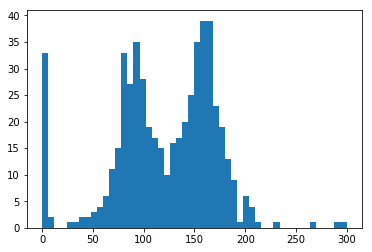

In [33]:
#tb1 = a[a['link'] == '(16066, 14997)']
#tb3 = tb2[tb2['ltt'] > 70]
plt.hist(tb4['ltt'], 50)
#tb1['ltt'].std()

In [36]:
#newcomb-benford law
tb3 = tb1[tb1['ltt'] > 0]
tb4 = tb3[tb3['ltt'] < 300]
len(tb4)

535

In [37]:
tb4['ltt'].mean()

120.61685343863644

In [38]:
tb4['ltt'].median()

126.61568759517132

In [68]:
tb5 = tb4[tb4['aproxlinkstart'] > '2017-03-01 10:00:00']
tb5 = tb5[tb5['aproxlinkstart'] <= '2017-03-01 11:00:00']
#tb5['ltt'].mean()
tb5

,_id,aproxlinkstart,link,ltt,travel_id,trip_id,headway
62,5c76efc0bd8143570ffef83f,2017-03-01 10:01:45.793,"(16066, 14997)",162.111082,7309,675K-10-0,667
63,5c76efc0bd8143570ffef840,2017-03-01 10:03:10.702,"(16066, 14997)",143.644046,7310,675K-10-0,85
64,5c76efc0bd8143570ffef841,2017-03-01 10:16:20.558,"(16066, 14997)",138.453917,7311,675K-10-0,790
65,5c76efc0bd8143570ffef842,2017-03-01 10:23:24.377,"(16066, 14997)",145.212295,7312,675K-10-0,424
66,5c76efc0bd8143570ffef843,2017-03-01 10:26:05.003,"(16066, 14997)",94.948568,7313,675K-10-0,161
67,5c76efc0bd8143570ffef844,2017-03-01 10:34:13.089,"(16066, 14997)",93.289440,7314,675K-10-0,488
68,5c76efc0bd8143570ffef845,2017-03-01 10:38:29.708,"(16066, 14997)",90.630365,7315,675K-10-0,257
69,5c76efc0bd8143570ffef846,2017-03-01 10:51:54.587,"(16066, 14997)",208.274248,7316,675K-10-0,805
70,5c76efc0bd8143570ffef847,2017-03-01 10:57:08.793,"(16066, 14997)",70.404902,7317,675K-10-0,314


In [50]:
tb5.mean()
#tb4.info()

ltt           127.440985
travel_id    7313.000000
headway       443.444444
dtype: float64

In [694]:
tb4.to_csv('example.txt', sep='\t')

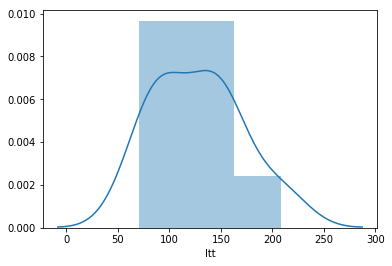

In [69]:
sns.distplot(tb5['ltt'])

In [71]:
a.dtypes

_id                       object
aproxlinkstart    datetime64[ns]
link                      object
ltt                      float64
travel_id                  int64
trip_id                   object
headway                    int64
dtype: object

In [52]:
# converter em hora
select['headway'][1] / np.timedelta64(1,'h')

#calcular a velocidade
speed = dist / (dt / np.timedelta64(1,'h'))

#alterando o index. Olhar o offset aliases para conversão correta
df1m = df.resample('1min').sum()

0.08027777777777778